In [1]:
import numpy as np
x = np.array([6.1101, 5.5277, 8.5186, 7.0032, 5.8598, 8.3829, 7.4764, 8.5781, 6.4862,
5.0546, 5.7107, 14.164, 5.734, 8.4084, 5.6407, 5.3794,6.3654, 5.1301, 6.4296,
7.0708, 6.1891, 20.27, 5.4901, 6.3261, 5.5649, 18.945, 12.828, 10.957, 13.176,
22.203, 5.2524, 6.5894,9.2482, 5.8918, 8.2111, 7.9334, 8.0959, 5.6063, 12.836,
6.3534, 5.4069, 6.8825, 11.708, 5.7737, 7.8247, 7.0931, 5.0702, 5.8014,11.7,
5.5416, 7.5402, 5.3077, 7.4239, 7.6031, 6.3328, 6.3589, 6.2742, 5.6397, 9.3102,
9.4536, 8.8254, 5.1793, 21.279, 14.908, 18.959,7.2182, 8.2951, 10.236, 5.4994,
20.341, 10.136, 7.3345, 6.0062, 7.2259, 5.0269, 6.5479, 7.5386, 5.0365, 10.274,
5.1077, 5.7292, 5.1884,6.3557, 9.7687, 6.5159, 8.5172, 9.1802, 6.002, 5.5204,
5.0594, 5.7077, 7.6366, 5.8707, 5.3054, 8.2934, 13.394, 5.4369])

y = np.array([17.592, 9.1302, 13.662, 11.854, 6.8233, 11.886, 4.3483, 12, 6.5987,
3.8166, 3.2522, 15.505, 3.1551, 7.2258, 0.71618, 3.5129, 5.3048, 0.56077,3.6518,
5.3893, 3.1386, 21.767, 4.263, 5.1875, 3.0825, 22.638, 13.501, 7.0467, 14.692,
24.147, -1.22, 5.9966, 12.134, 1.8495, 6.5426, 4.5623,4.1164, 3.3928, 10.117,
5.4974, 0.55657, 3.9115, 5.3854, 2.4406, 6.7318, 1.0463, 5.1337, 1.844, 8.0043,
1.0179, 6.7504, 1.8396, 4.2885, 4.9981,1.4233, -1.4211, 2.4756, 4.6042, 3.9624,
5.4141, 5.1694, -0.74279, 17.929, 12.054, 17.054, 4.8852, 5.7442, 7.7754, 1.0173,
20.992, 6.6799, 4.0259,1.2784, 3.3411, -2.6807, 0.29678, 3.8845, 5.7014, 6.7526,
2.0576, 0.47953, 0.20421, 0.67861, 7.5435, 5.3436, 4.2415, 6.7981, 0.92695,
0.152, 2.8214,1.8451, 4.2959, 7.2029, 1.9869, 0.14454, 9.0551, 0.61705])

In [2]:
def linear_regression_analytical(x, y):
    x = np.array(x)
    y = np.array(y)
    X = np.c_[np.ones(x.shape[0]), x]
    X_transpose = X.T
    beta = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)
    return beta

In [3]:
print(linear_regression_analytical(x, y))

[-3.89578088  1.19303364]


In [4]:
coefs = linear_regression_analytical(x, y)
errors = []
for i in range(len(x)):
  res = x[i] * coefs[1] + coefs[0]
  res = (res - y[i])**2
  errors.append(res)
mse = sum(errors)/len(x)
mse

8.953942751950358

In [5]:
coefs = [round(elem, 4) for elem in coefs]

In [6]:
j = 15
print(x[j] * coefs[1] + coefs[0], y[j])

2.5218242000000006 3.5129


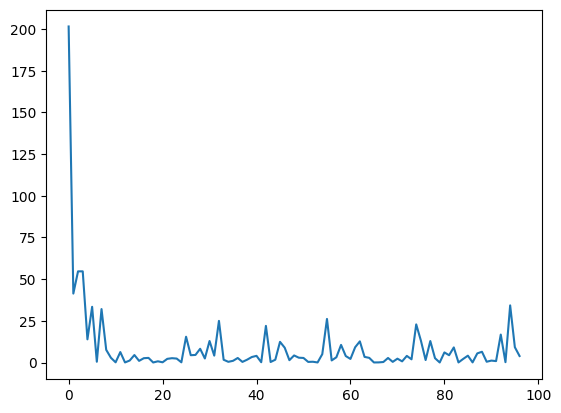

In [7]:
import matplotlib.pyplot as plt

plt.plot([i for i in range(len(x))],errors)

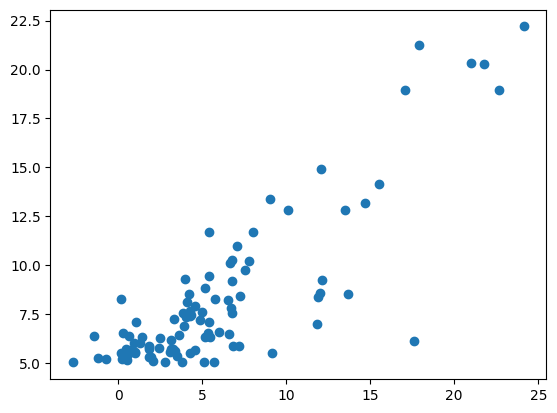

In [8]:
plt.scatter(y,x)

In [9]:
def gradient_descent(x, y, alpha=0.01, max_iter=10000, tol=1e-6):
    X = np.column_stack((np.ones(len(x)), x))
    theta = np.random.rand(2)
    cost_history = []
    iteration = 0
    while iteration < max_iter:
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (2 / len(y)) * X.T.dot(errors)
        old_theta = theta.copy()
        theta -= alpha * gradient
        cost = (1 / len(y)) * np.sum(np.square(errors))
        cost_history.append(cost)
        if np.all(np.abs(old_theta - theta) < tol):
            break
        iteration += 1
    print(f"Конвергенция достигнута за {iteration} итераций")
    print(f"Финальные коэффициенты: y = {theta[1]:.4f}x + {theta[0]:.4f}")

    return theta, cost_history


In [10]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(x, y, alpha=0.01, max_iter=1000000, tol=1e-8):
    X = np.column_stack((np.ones(len(x)), x))
    theta = np.random.rand(2)
    cost_history = []
    iteration = 0
    while iteration < max_iter:
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (2 / len(y)) * X.T.dot(errors)
        old_theta = theta.copy()
        theta -= alpha * gradient
        cost = (1 / len(y)) * np.sum(np.square(errors))
        cost_history.append(cost)
        if np.all(np.abs(old_theta - theta) < tol):
            break
        iteration += 1
    print(f"Конвергенция достигнута за {iteration} итераций")
    print(f"Финальные коэффициенты: y = {theta[1]:.4f}x + {theta[0]:.4f}")
    return theta, cost_history





In [11]:
theta, cost_history = gradient_descent(x, y)
predicted_y = theta[0] + theta[1] * x[5]
print(f'Финальные коэффициенты аналитическим методом: y ={coefs[1]}х + {coefs[0]}')
print(f'Результат, посчитанный численным методом: {predicted_y}, результат полученный аналитически {x[5]*coefs[1]+coefs[0]}, правильный результат {y[5]}')

Конвергенция достигнута за 3983 итераций
Финальные коэффициенты: y = 1.1930x + -3.8958
Финальные коэффициенты аналитическим методом: y =1.193х + -3.8958
Результат, посчитанный численным методом: 6.105301292890356, результат полученный аналитически 6.1049997000000005, правильный результат 11.886


Предсказанное значение для x=5: [2.06938872] 11.886


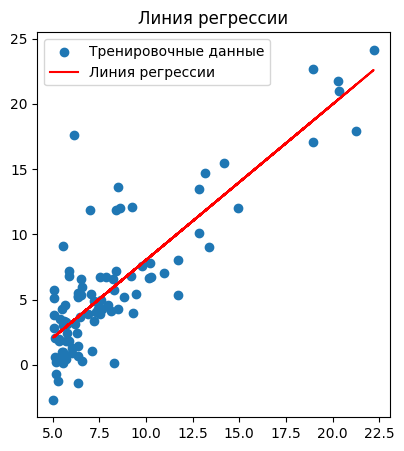

In [12]:
# Визуализация процесса обучения
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(x, y, label='Тренировочные данные')
plt.plot(x, theta[0] + theta[1]*x, color='red', label='Линия регрессии')
plt.legend()
plt.title('Линия регрессии')
new_x = np.array([5])
predicted_y = theta[0] + theta[1] * new_x
print("Предсказанное значение для x=5:", predicted_y,y[5])


Text(0, 0.5, 'Стоимость')

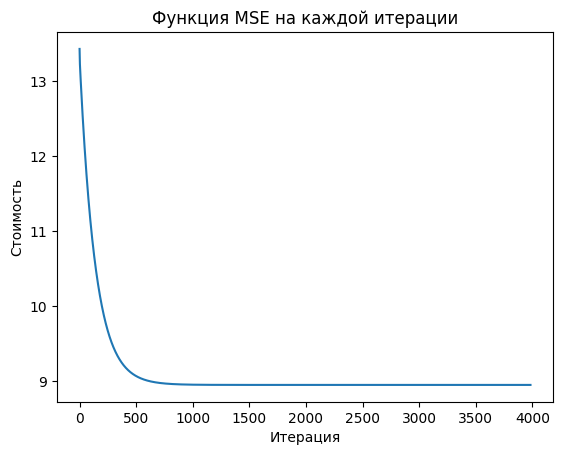

In [13]:
plt.plot(cost_history)
plt.title('Функция MSE на каждой итерации')
plt.xlabel('Итерация')
plt.ylabel('Стоимость')

In [17]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

In [15]:
california_housing = fetch_california_housing()
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = pd.Series(california_housing.target)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
models = {
    'Linear regression': LinearRegression(),
    'Lasso regression': Lasso(alpha = 0.1),
    'Ridge regression': Ridge(alpha = 0.1),
}

In [28]:
for name in models.keys():
  model = models[name]
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  print(f'Mean Squared Error for {name} if {mse}')
  print(f'R2 for {name} is {r2}')
  print('\n')


Mean Squared Error for Linear regression if 0.5558915986952444
R2 for Linear regression is 0.5757877060324508


Mean Squared Error for Lasso regression if 0.6135115198058131
R2 for Lasso regression is 0.5318167610318159


Mean Squared Error for Ridge regression if 0.55588275431138
R2 for Ridge regression is 0.5757944553633934


